# **Import the Dataset**

In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!mkdir -p ~/.login.htm
!cp login.htm ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:52<00:00, 22.3MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.7MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# **Import the Libraries**

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# **Generators**

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## **Normalize**

In [8]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## **create CNN model**

In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 109ms/step - loss: 1.3464 - accuracy: 0.5939 - val_loss: 0.6140 - val_accuracy: 0.6638
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6142 - accuracy: 0.6831 - val_loss: 0.5480 - val_accuracy: 0.7274
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5072 - accuracy: 0.7512 - val_loss: 0.5462 - val_accuracy: 0.7258
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4430 - accuracy: 0.7943 - val_loss: 0.4760 - val_accuracy: 0.7716
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3930 - accuracy: 0.8220 - val_loss: 0.4045 - val_accuracy: 0.8198
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3361 - accuracy: 0.8543 - val_loss: 0.4470 - val_accuracy: 0.7986
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2579 - accuracy: 0.8921 - val_loss: 0.5100 - val_ac

# **Matplotlib plot**

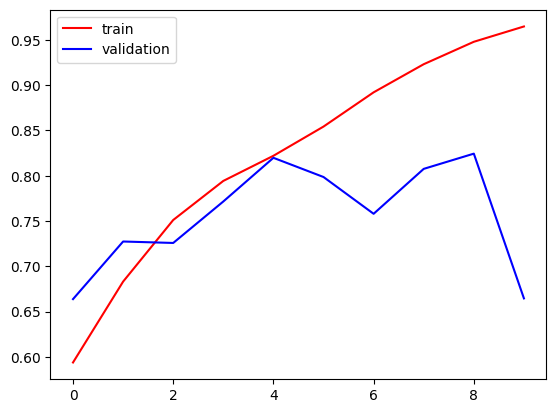

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

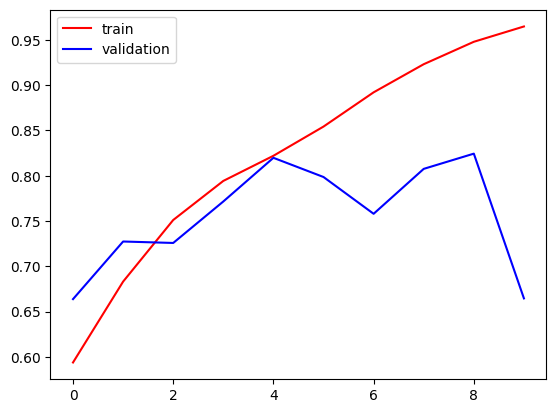

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

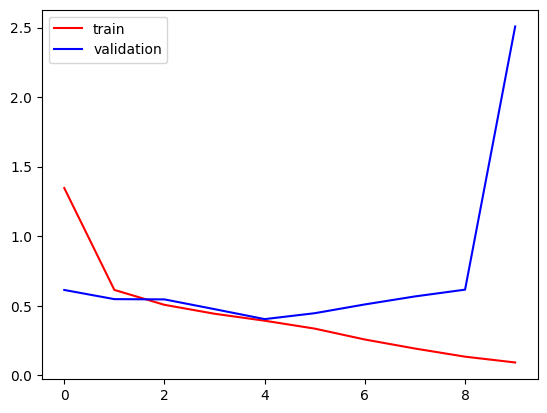

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

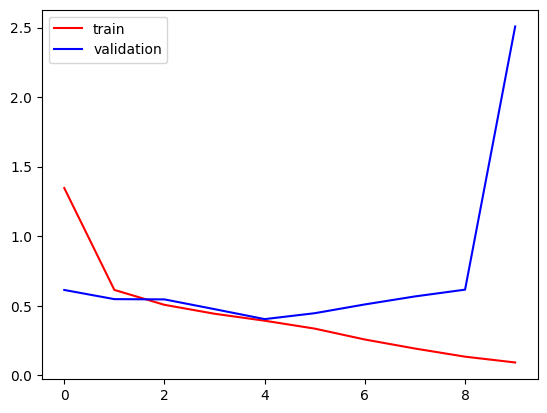

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# ways to reduce overfitting


 Add more data

 Data Augmentation

 L1/L2 Regularizer

 Dropout

 Batch Norm

 Reduce complexity








In [22]:
import cv2

In [56]:
test_img = cv2.imread('/content/dog.jpeg')

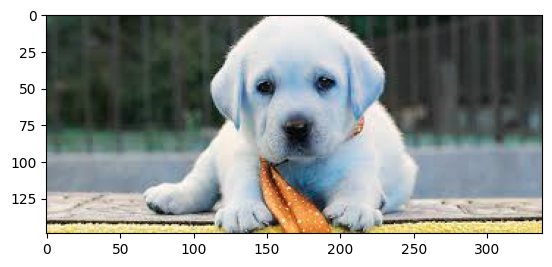

In [57]:
plt.imshow(test_img)

In [58]:
test_img.shape

(149, 338, 3)

In [59]:
test_img = cv2.resize(test_img,(256,256))

In [60]:
test_input = test_img.reshape((1,256,256,3))

In [61]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)